In [24]:
%load_ext lab_black
import warnings
import urllib

warnings.filterwarnings("ignore")
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [25]:
# Loading the data
data_2021 = pd.read_csv("../data/airbnb_listings_2021.csv")
data_2021.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [26]:
# Dropping irrelevant columns and those that are unethical to use
data_2021.drop(
    [
        "id",
        "host_name",
        "last_review",
        "license",
        "host_id",
        "number_of_reviews",
        "reviews_per_month",
        "number_of_reviews_ltm",
    ],
    axis=1,
    inplace=True,
)

In [27]:
# Replacing the missing values for numerical columns with mean and mode
data_2021["price"] = data_2021["price"].fillna(data_2021["price"].mean())
data_2021["minimum_nights"] = data_2021["minimum_nights"].fillna(
    data_2021["minimum_nights"].mean()
)
data_2021["name"] = data_2021["name"].fillna(data_2021["name"].mode()[0])
data_2021["calculated_host_listings_count"] = data_2021[
    "calculated_host_listings_count"
].fillna(data_2021["calculated_host_listings_count"].mean())
data_2021["availability_365"] = data_2021["availability_365"].fillna(
    data_2021["availability_365"].mean()
)
data_2021["neighbourhood_group"] = data_2021["neighbourhood_group"].fillna(
    data_2021["neighbourhood_group"].mode()[0]
)
data_2021.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

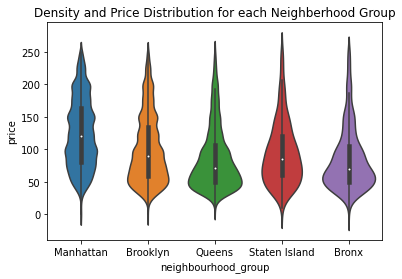

In [28]:
# removing extreme values in the variable 'price' for better visualization results
# filtering for price values less than 250
data2 = data_2021[data_2021.price < 250]
# using a violinplot to showcase density and distribtuion of prices
violinplot = sns.violinplot(data=data2, x="neighbourhood_group", y="price")
violinplot.set_title("Density and Price Distribution for each Neighberhood Group")

violinplot = violinplot.get_figure()
violinplot.savefig("../artifacts/violinplot.png", transparent=False)

In [29]:
# Top 10 neighbourhoods by calculated host listing count

neighborhood_top10 = (
    data2.groupby(["neighbourhood"])["calculated_host_listings_count"]
    .count()
    .to_frame()
    .sort_values(["calculated_host_listings_count"], ascending=[False])
    .head(10)
)
neighborhood_top10

,calculated_host_listings_count
neighbourhood,
Bedford-Stuyvesant,2401
Williamsburg,2224
Harlem,1769
Bushwick,1557
Hell's Kitchen,1153
Upper West Side,1151
Upper East Side,1139
Crown Heights,1071
East Village,995


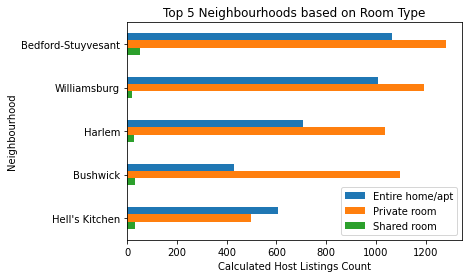

In [31]:
# Top 5 Neighbourhoods by Calculated Host Listings based on Room Type
neighborhood_top5 = neighborhood_top10.head(5)
neighborhood_top5_2 = (
    data2.groupby(["neighbourhood", "room_type"])["room_type"]
    .size()
    .unstack(fill_value=20)
)
neighborhood_top5_count = pd.merge(
    neighborhood_top5, neighborhood_top5_2, how="left", on=["neighbourhood"]
)
neighborhood_top5_count = neighborhood_top5_count[
    ["Entire home/apt", "Private room", "Shared room"]
]
barplot = neighborhood_top5_count.plot(kind="barh")
plt.title("Top 5 Neighbourhoods based on Room Type")
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Neighbourhood")
ax = plt.gca()
ax.invert_yaxis()

barplot = barplot.get_figure()
barplot.savefig("../artifacts/barplot.png", transparent=False)

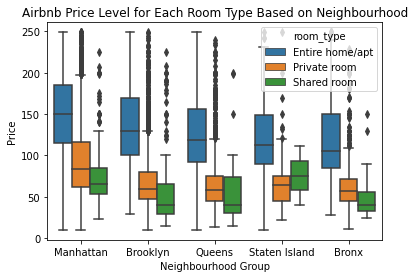

In [32]:
# Dropping hotel room values and focusing on the other three main room categories
data2.drop(data2.index[data2["room_type"] == "Hotel room"], inplace=True)

# Boxplot for Airbnb Price Level for Each Room Type Based on Neighbourhood
Boxplot = sns.boxplot(y="price", data=data2, x="neighbourhood_group", hue="room_type")
plt.title("Airbnb Price Level for Each Room Type Based on Neighbourhood")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

Boxplot = Boxplot.get_figure()
Boxplot.savefig("../artifacts/Boxplot.png", transparent=False)

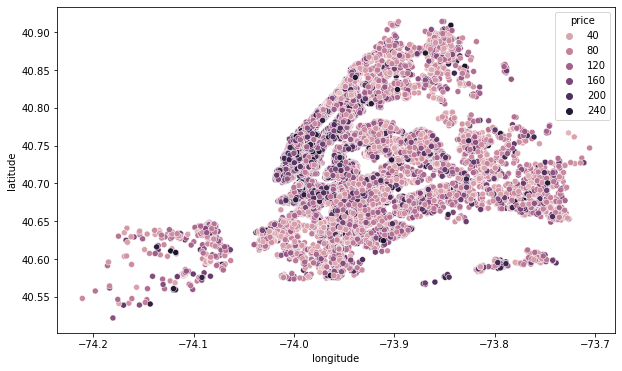

In [33]:
# A price map based on longitute and latitude
cmap = sns.cubehelix_palette(dark=0.1, light=0.8, as_cmap=True)
heatmap1 = plt.figure(figsize=(10, 6))
sns.scatterplot(
    data2.longitude, data2.latitude, hue=data2.price, palette=cmap, sizes=(30, 200)
)
plt.ioff()

heatmap1 = heatmap1.get_figure()
heatmap1.savefig("../artifacts/heatmap1.png", transparent=False)

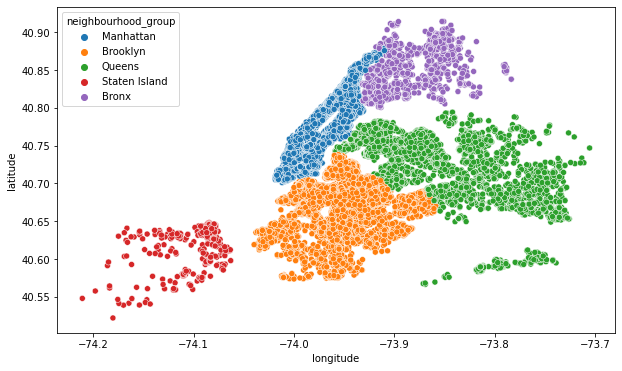

In [34]:
# Map by neighbourhood group based on latitute and longitude
heatmap2 = plt.figure(figsize=(10, 6))
sns.scatterplot(data2.longitude, data2.latitude, hue=data2.neighbourhood_group)
plt.ioff()

heatmap2 = heatmap2.get_figure()
heatmap2.savefig("../artifacts/heatmap2.png", transparent=False)

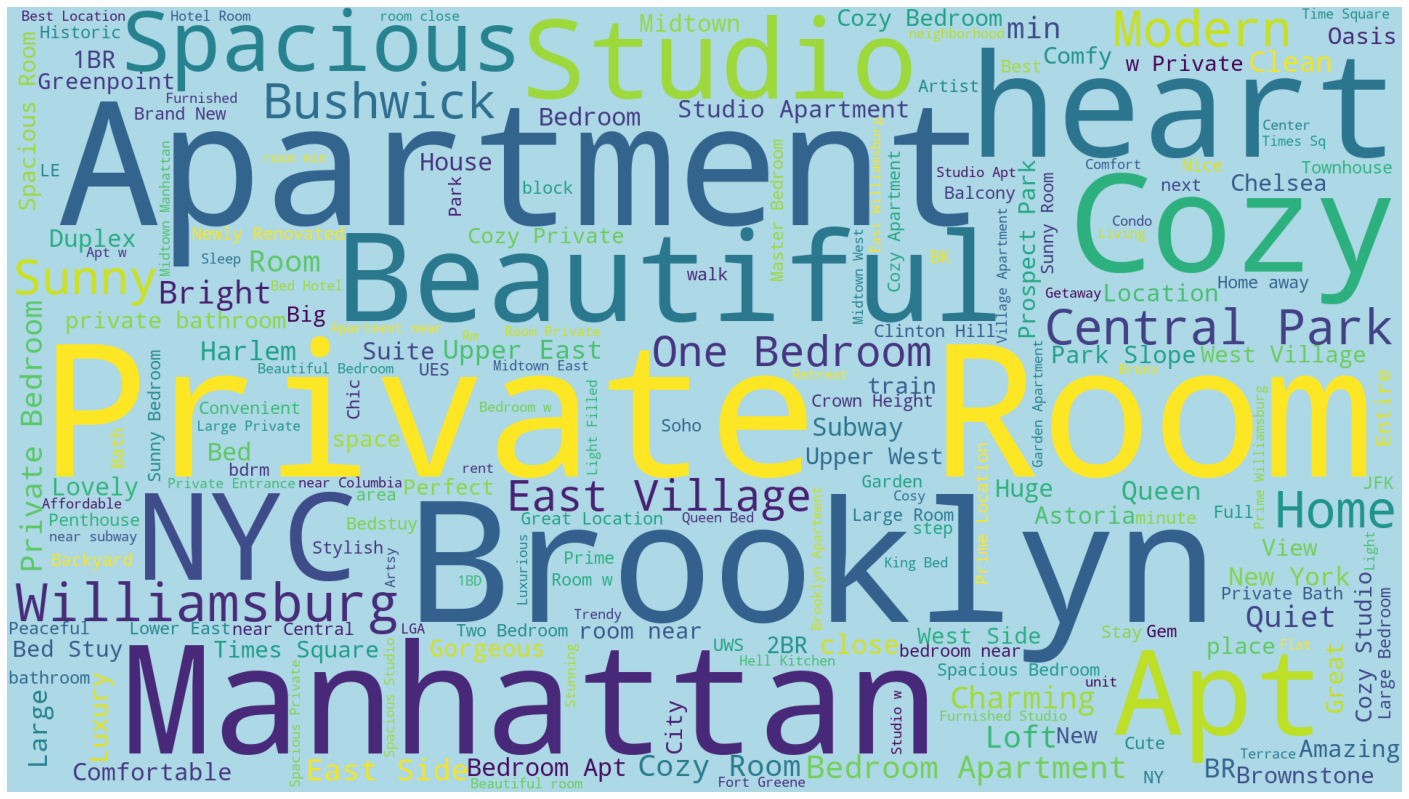

In [23]:
# Visualizing keywords used for airbnb listings
plt.subplots(figsize=(25, 15))
wordcloud = WordCloud(background_color="lightblue", width=1920, height=1080).generate(
    " ".join(data2.name)
)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()